# Installing Required Packages

In [ ]:
!pip install qiskit ipywidgets
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing Required Libraries

In [ ]:
import qiskit
from qiskit import *
from qiskit.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.image as img
import cv2

#Entanglement Generation

## Creating the Circuit and Making Measurement

In [ ]:
# Creating Registers
qr=QuantumRegister(2)
cr=ClassicalRegister(2)
circuit=QuantumCircuit(qr,cr)

# Creating Hadarmard and CNOT gate and Making measurement
circuit.h(qr[0])
circuit.cx(qr[0],qr[1])
circuit.measure(qr,[cr[0],cr[1]])

# Simulating the experiment
simulator=Aer.get_backend('qasm_simulator')
result=execute(circuit,backend=simulator).result()

## Visualizing Circuit and Observing Measurement Results

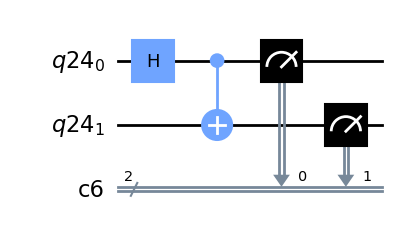

In [ ]:
circuit_drawer(circuit, output='mpl')

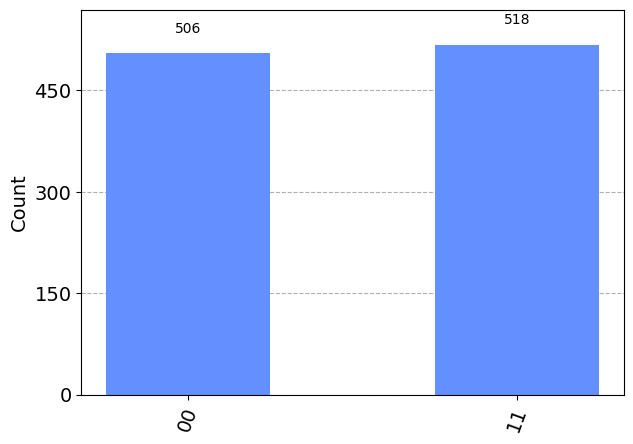

In [ ]:
plot_histogram(result.get_counts(circuit))

As we can see, the first bell state is generated

# Simulating Ghost Imaging

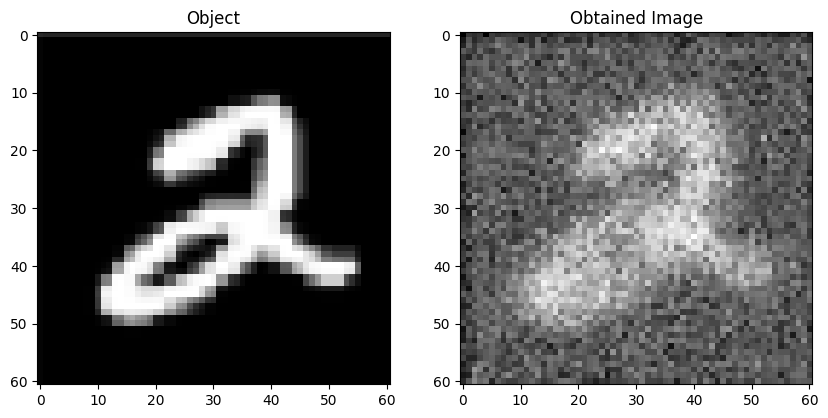

In [ ]:
# Loading the image in black and white
fig=plt.figure(figsize=(10,10))
obj1=img.imread('/content/drive/MyDrive/quantum_imaging/mnist_2_new.png')
obj=obj1[:,:,0]
fig.add_subplot(1,2,1)
plt.imshow(obj[1:-2,1:-2],cmap='Greys')
plt.title('Object')

# The size of our camera sensor
frame_size=64
# Note: The object matrix contains absorptivity values for the object
photons_per_pixel=100
bucket_detector=np.zeros(frame_size**2)
single_photon_detector=np.zeros((frame_size,frame_size))

# Defining scale of all errors
error_in_spacial_corr=0.03 # out of 1
surrounding_photons_prob = 0.01 # out of 1
error_in_apparatus = 0.05 # out of 1

# Simulating the experiment
c=0
for k in range(photons_per_pixel):
  for i in range(frame_size):
    for j in range(frame_size): # Simulating error in spacial correlation of photons
      random_number=np.random.randn(1)+0.5
      random_number_for_noise=np.random.randn(1)+0.5
      random_number_for_error_in_apparatus=np.random.randn(1)+0.5
      # Bucket Detector
      if random_number<=obj[i,j]:
        bucket_detector[c]+=1
      if random_number_for_noise <= surrounding_photons_prob:
        if random_number_for_error_in_apparatus > error_in_apparatus:
          bucket_detector[c]+=1
      # Spatial Detector
      if random_number>obj[i,j]:
        error_x=error_in_spacial_corr*frame_size*random.uniform(-2,2)
        error_y=error_in_spacial_corr*frame_size*random.uniform(-2,2)
        X=round(i+error_x)
        Y=round(j+error_y)
        if X>=frame_size:
          X=frame_size-1
        elif X<0:
          X=0
        if Y>=frame_size:
          Y=frame_size-1
        elif Y<0:
          Y=0
        single_photon_detector[X,Y]+=1
  c+=1
single_photon_detector=single_photon_detector[1:-2,1:-2] # Eliminating edge pixels

# Plotting Obtained Image
fig.add_subplot(1,2,2)
plt.imshow(np.ones((frame_size,frame_size))[1:-2,1:-2]-single_photon_detector,cmap='Greys')
plt.title('Obtained Image')
plt.show()

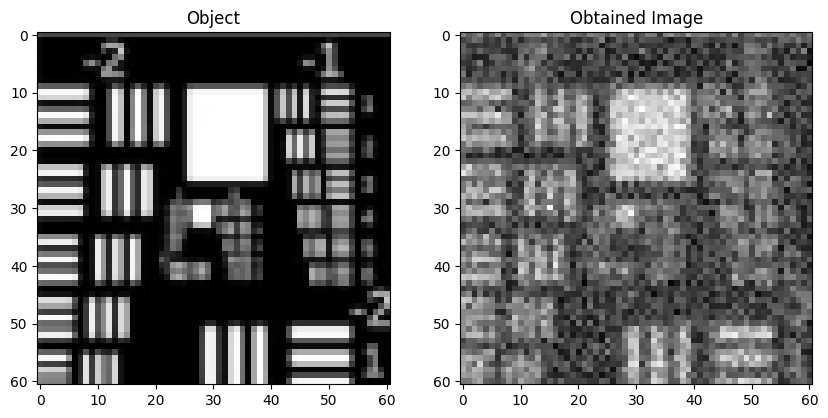

In [ ]:
# Loading the image in black and white
fig=plt.figure(figsize=(10,10))
obj1=cv2.imread('/content/drive/MyDrive/quantum_imaging/GIDC_ground_truth.png',cv2.IMREAD_GRAYSCALE)
obj1 = cv2.bitwise_not(obj1)
obj=img = cv2.resize(obj1, (64, 64))/255
fig.add_subplot(1,2,1)
plt.imshow(obj[1:-2,1:-2],cmap='Greys')
plt.title('Object')

# The size of our camera sensor
frame_size=64
# Note: The object matrix contains absorptivity values for the object
photons_per_pixel=100
bucket_detector=np.zeros(frame_size**2)
single_photon_detector=np.zeros((frame_size,frame_size))

# Defining scale of all errors
error_in_spacial_corr=0.006 # out of 1
surrounding_photons_prob = 0.005 # out of 1
error_in_apparatus = 0.005 # out of 1

# Simulating the experiment
c=0
for k in range(photons_per_pixel):
  for i in range(frame_size):
    for j in range(frame_size): # Simulating error in spacial correlation of photons
      random_number=np.random.randn(1)+0.5
      random_number_for_noise=np.random.randn(1)+0.5
      random_number_for_error_in_apparatus=np.random.randn(1)+0.5
      # Bucket Detector
      if random_number<=obj[i,j]:
        bucket_detector[c]+=1
      if random_number_for_noise <= surrounding_photons_prob:
        if random_number_for_error_in_apparatus > error_in_apparatus:
          bucket_detector[c]+=1
      # Spatial Detector
      if random_number>obj[i,j]:
        error_x=error_in_spacial_corr*frame_size*random.uniform(-2,2)
        error_y=error_in_spacial_corr*frame_size*random.uniform(-2,2)
        X=round(i+error_x)
        Y=round(j+error_y)
        if X>=frame_size:
          X=frame_size-1
        elif X<0:
          X=0
        if Y>=frame_size:
          Y=frame_size-1
        elif Y<0:
          Y=0
        single_photon_detector[X,Y]+=1
  c+=1
single_photon_detector=single_photon_detector[1:-2,1:-2] # Eliminating edge pixels

# Plotting Obtained Image
fig.add_subplot(1,2,2)
plt.imshow(np.ones((frame_size,frame_size))[1:-2,1:-2]-single_photon_detector,cmap='Greys')
plt.title('Obtained Image')
plt.show()

# Cleaning the Obtained Image

## Using Gaussian filter and Thresholding

### Load the Noisy Image

(-0.5, 63.5, 63.5, -0.5)

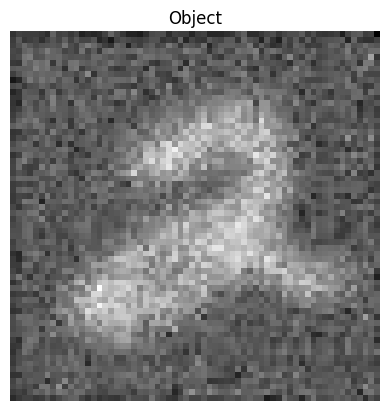

In [ ]:
img = cv2.imread('/content/drive/MyDrive/quantum_imaging/GI_result.png')
img = cv2.resize(img, (64, 64))
plt.imshow(img,cmap='Greys')
plt.title('Object')
plt.axis('off')

### Check various values of blur

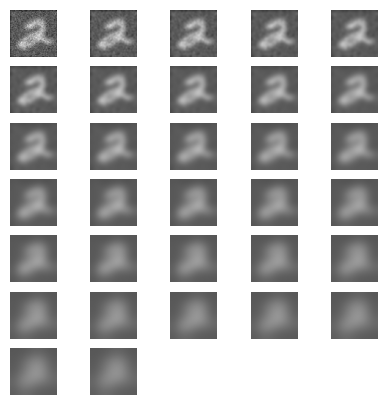

In [ ]:
fig=plt.figure(figsize=(5,5))
c=1
for i in range(1,64,2):
  fig.add_subplot(7,5,c)
  denoised_img = cv2.GaussianBlur(img, (i, i), 0)
  cv2.imwrite('denoised_image.png', denoised_img)
  plt.imshow(denoised_img,cmap='Greys')
  plt.axis('off')
  c+=1

### Apply the best blur

(-0.5, 63.5, 63.5, -0.5)

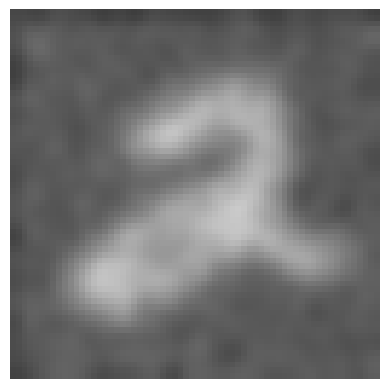

In [ ]:
denoised_img = cv2.GaussianBlur(img, (7, 7), 0)
cv2.imwrite('denoised_image.png', denoised_img)
plt.imshow(denoised_img,cmap='Greys')
plt.axis('off')

### Check various threshold values

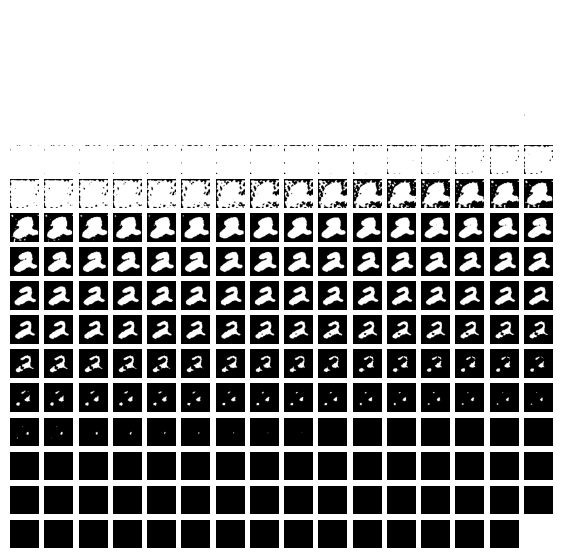

In [ ]:
fig=plt.figure(figsize=(7,7))
c=1
for i in range(1,256):
  fig.add_subplot(16,16,c)
  _, thresh_img = cv2.threshold(denoised_img, i, 255, cv2.THRESH_BINARY)
  plt.imshow(thresh_img,cmap='Greys')
  plt.axis('off')
  c+=1

### Apply the best Threshold value

(-0.5, 63.5, 63.5, -0.5)

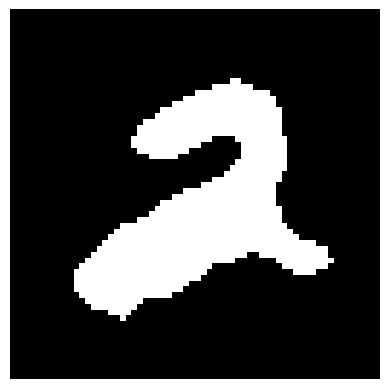

In [ ]:
fig=plt.figure()
_, thresh_img = cv2.threshold(denoised_img, 140, 255, cv2.THRESH_BINARY)
plt.imshow(thresh_img,cmap='Greys')
plt.axis('off')

### Display Final Outcome

(-0.5, 63.5, 63.5, -0.5)

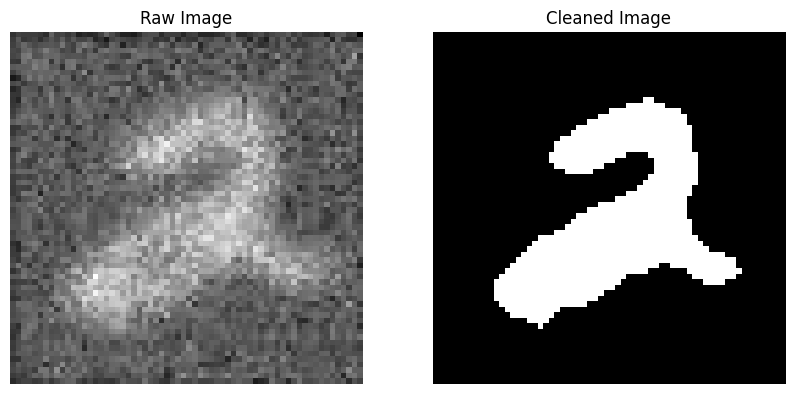

In [ ]:
fig=plt.figure(figsize = (10,10))
fig.add_subplot(1,2,1)
plt.imshow(img)
plt.title('Raw Image')
plt.axis('off')
fig.add_subplot(1,2,2)
plt.imshow(thresh_img,cmap='Greys')
plt.title('Cleaned Image')
plt.axis('off')

## Cleaning Techniques

(-0.5, 200.5, 200.5, -0.5)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

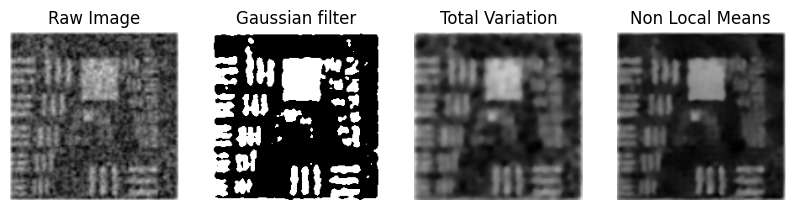

In [ ]:
# Loading the Image
img = cv2.imread('/content/drive/MyDrive/quantum_imaging/GIDC_raw_image.png',cv2.IMREAD_GRAYSCALE)
img = cv2.bitwise_not(img)

# Gaussian Filtering
Gaussian_denoised_img = cv2.GaussianBlur(img, (7,7), 0)
_, gaussian = cv2.threshold(Gaussian_denoised_img, 140, 255, cv2.THRESH_BINARY)

from skimage.restoration import denoise_tv_chambolle
tvdenoised_img = denoise_tv_chambolle(img, weight=0.2)
fig=plt.figure()
_, TVD = cv2.threshold(tvdenoised_img, 0.51, 1, cv2.THRESH_BINARY)

nlm_denoised = cv2.fastNlMeansDenoising(img,h=20)
fig=plt.figure()
_, nlm = cv2.threshold(nlm_denoised, 140, 256, cv2.THRESH_BINARY)

# No of Techniques
nt = 3
fig=plt.figure(figsize = (10,10))
fig.add_subplot(1,nt+1,1)
plt.imshow(img,cmap='Greys')
plt.title('Raw Image')
plt.axis('off')
fig.add_subplot(1,nt+1,2)
plt.imshow(gaussian,cmap='Greys')
plt.title('Gaussian filter')
plt.axis('off')
fig.add_subplot(1,nt+1,3)
plt.imshow(tvdenoised_img,cmap='Greys')
plt.title('Total Variation')
plt.axis('off')

fig.add_subplot(1,nt+1,4)
plt.imshow(nlm_denoised,cmap='Greys')
plt.title('Non Local Means')
plt.axis('off')